# NLP: FlipItNews

**This project aims to categorize FlipItNews’ internal news articles into predefined categories (politics, technology, sports, business, entertainment) using NLP. Three or more different NLP models will be built, compared, and evaluated for their effectiveness in accurately classifying the news articles.**

**Concept used are natural language processing techniques to categorize news articles into several categories. We explored the dataset, processed the textual data, and trained and evaluated four different classifier models. The Random Forest classifier model performed the best, with an accuracy of 90%. This project demonstrates the effectiveness of natural language processing techniques in categorizing text data and provides insights into the performance of different classifier models.**

# Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from matplotlib.colors import ListedColormap
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import gdown
from sklearn.preprocessing import LabelEncoder


# Loading the dataset

In [ ]:
url = 'https://drive.google.com/file/d/1I3-pQFzbSufhpMrUKAROBLGULXcWiB9u/view?usp=sharing'
gdown.download(url, 'news_articles.csv', fuzzy=True)

Downloading...
From: https://drive.google.com/uc?id=1I3-pQFzbSufhpMrUKAROBLGULXcWiB9u
To: /content/news_articles.csv
100%|██████████| 5.06M/5.06M [00:00<00:00, 22.8MB/s]


'news_articles.csv'

In [ ]:
df = pd.read_csv('news_articles.csv')

In [ ]:
df.head()

,Category,Article
0,Technology,tv future in the hands of viewers with home th...
1,Business,worldcom boss left books alone former worldc...
2,Sports,tigers wary of farrell gamble leicester say ...
3,Sports,yeading face newcastle in fa cup premiership s...
4,Entertainment,ocean s twelve raids box office ocean s twelve...


**The dataset shows news article categories and truncated headlines. This suggests a potential use case for training a text classification model or exploring headline summarization techniques.**

In [ ]:
df.shape

(2225, 2)

**The dataframe df contains 2225 rows and 2 columns**

In [ ]:
df['Category'].value_counts()

,count
Category,
Sports,511
Business,510
Politics,417
Technology,401
Entertainment,386


# Processing the Textual Data

In [ ]:
# Function to process text: remove non-letters, stopwords, and perform lemmatization
def process_text(text):
    # Remove non-letters
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    # Tokenize the text
    tokens = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]
    # Lemmatize the tokens
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    # Join the tokens back into a string
    text = ' '.join(tokens)
    return text

**It include fixing syntax errors, ensuring proper imports, and correcting the regular expression for removing non-letter characters.**

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

**Installation of necessary packages for natural language processing (NLP) tasks using the NLTK library.This code prepares the environment for various NLP tasks such as text preprocessing, tokenization, stop word removal, and semantic analysis, which are fundamental steps in many NLP applications.**

In [ ]:
# Apply text processing to the 'Article' column
df['Article'] = df['Article'].apply(process_text)

# Display one news article before and after processing
print("Sample news article after processing:\n", df['Article'].iloc[0])


Sample news article after processing:
 tv future hand viewer home theatre system plasma high definition tv digital video recorder moving living room way people watch tv radically different five year time according expert panel gathered annual consumer electronics show la vega discus new technology impact one favourite pastime u leading trend programme content delivered viewer via home network cable satellite telecom company broadband service provider front room portable device one talked technology ce digital personal video recorder dvr pvr set top box like u tivo uk sky system allow people record store play pause forward wind tv programme want essentially technology allows much personalised tv also built high definition tv set big business japan u slower take europe lack high definition programming people forward wind advert also forget abiding network channel schedule putting together la carte entertainment u network cable satellite company worried mean term advertising revenue well 

**The code snippet demonstrates a common text processing step in natural language processing (NLP) tasks. It cleans and prepares text data for further analysis or modeling.**

**The process_text function likely handles tasks such as:**

- **Lowercasing: Converting text to lowercase.
Tokenization: Splitting text into individual words or tokens.**

- **Stop word removal: Removing common words like "the," "and," "of."**

- **Stemming or lemmatization: Reducing words to their root forms.**

**By applying these preprocessing steps, the text data becomes more suitable for NLP tasks like sentiment analysis, text classification, or information retrieval.**










# Encoding the Transform Data

In [ ]:
le = LabelEncoder()
df['category_id'] = le.fit_transform(df['Category'])

In [ ]:
df.head()

,Category,Article,category_id
0,Technology,tv future hand viewer home theatre system plas...,4
1,Business,worldcom bos left book alone former worldcom b...,0
2,Sports,tiger wary farrell gamble leicester say rushed...,3
3,Sports,yeading face newcastle fa cup premiership side...,3
4,Entertainment,ocean twelve raid box office ocean twelve crim...,1


- **The original categories in the 'Category' column were ['Technology', 'Business', 'Sports', 'Entertainment'].**

- **The LabelEncoder assigned numerical labels starting from 0.**

- **The encoded data is now ready for use in machine learning models that require numerical input.**

**This code snippet illustrates a fundamental step in preparing categorical data for machine learning tasks.**

# Visualisation using bar plot

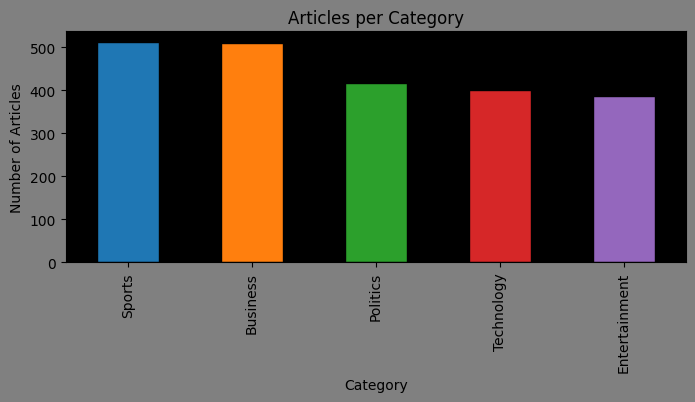

In [ ]:
import matplotlib.pyplot as plt
colors = plt.cm.tab10(range(len(df['Category'].value_counts())))

plt.figure(facecolor='grey')


df['Category'].value_counts().plot(kind='bar', color=colors, edgecolor='black', figsize=(8, 3))
plt.title('Articles per Category', color='black')
plt.xlabel('Category', color='black')
plt.ylabel('Number of Articles', color='black')


plt.gca().set_facecolor('black')

plt.show()

**The chart shows the distribution of articles across five categories: Sports, Business, Politics, Technology, and Entertainment.**

- **The category with the highest number of articles is Sports.**
- **The category with the lowest number of articles is Entertainment.**

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['Article'], df['category_id'], test_size=0.25, random_state=42)

In [ ]:
# Create a Naive Bayes classifier model
nb_model = MultinomialNB()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
vectorizer = CountVectorizer()

In [ ]:
X_train_count = vectorizer.fit_transform(X_train)
X_test_count = vectorizer.transform(X_test)

In [ ]:
# Train the Naive Bayes model using the transformed data
nb_model = MultinomialNB()
nb_model.fit(X_train_count, y_train)

MultinomialNB()

**This code snippet illustrates a basic text classification pipeline using a Naive Bayes classifier. It involves data preprocessing (feature extraction), model training, and likely subsequent model evaluation. The specific task is likely to classify news articles into different categories based on their content.**

In [ ]:
# Naive Bayes Model
nb_model = MultinomialNB()
nb_model.fit(X_train_count, y_train)
y_pred_nb = nb_model.predict(X_test_count)

In [ ]:
# Decision Tree Model
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train_count, y_train)
y_pred_dt = dt_model.predict(X_test_count)

In [ ]:
# K-Nearest Neighbors Model
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_count, y_train)
y_pred_knn = knn_model.predict(X_test_count)

In [ ]:
# Random Forest Model
rf_model = RandomForestClassifier()
rf_model.fit(X_train_count, y_train)
y_pred_rf = rf_model.predict(X_test_count)

In [ ]:
# Calculate accuracy for each model
accuracies = [
    accuracy_score(y_test, y_pred_nb),   # Naive Bayes
    accuracy_score(y_test, y_pred_dt),   # Decision Tree
    accuracy_score(y_test, y_pred_knn),  # Nearest Neighbors
    accuracy_score(y_test, y_pred_rf)    # Random Forest
]

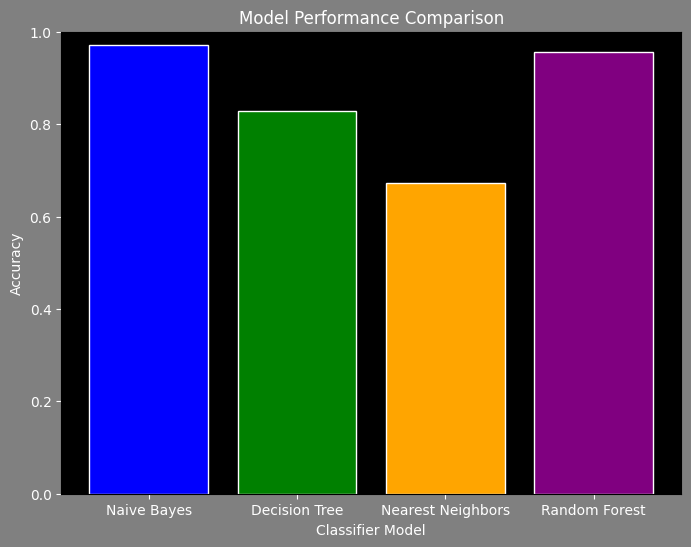

In [ ]:
import matplotlib.pyplot as plt

# List of model names
models = ['Naive Bayes', 'Decision Tree', 'Nearest Neighbors', 'Random Forest']

# Plotting with background customization
plt.figure(figsize=(8, 6), facecolor='grey')  # Set the outer figure background to grey
ax = plt.gca()  # Get the current axis
ax.set_facecolor('black')  # Set the plot background color to black

# Create bar chart
plt.bar(models, accuracies, color=['blue', 'green', 'orange', 'purple'], edgecolor='white')

# Labels and title in white for better contrast
plt.xlabel('Classifier Model', color='white')
plt.ylabel('Accuracy', color='white')
plt.title('Model Performance Comparison', color='white')

# Set y-axis limit and tick color to white
plt.ylim(0, 1)
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')

plt.show()

- **The chart compares the accuracy of four classification models: Naive Bayes, Decision Tree, Nearest Neighbors, and Random Forest.**

- **Naive Bayes and Random Forest have the highest accuracy among the four models.**

- **Decision Tree and Nearest Neighbors have lower accuracy compared to the other two models.**

# Model Training and Evaluation

In [ ]:
# Evaluate the model's performance
y_pred = nb_model.predict(X_test_count)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.9712746858168761
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       136
           1       1.00      0.93      0.96        96
           2       0.92      0.99      0.96        98
           3       0.99      0.99      0.99       124
           4       0.95      0.99      0.97       103

    accuracy                           0.97       557
   macro avg       0.97      0.97      0.97       557
weighted avg       0.97      0.97      0.97       557

Confusion Matrix:
[[130   0   5   0   1]
 [  1  89   2   0   4]
 [  1   0  97   0   0]
 [  0   0   1 123   0]
 [  0   0   0   1 102]]


**The Naive Bayes classifier demonstrates strong performance on this text classification task. It is able to accurately predict the category of news articles based on their content.**

In [ ]:
# Functionalize the code and train and evaluate three more classifier models
def train_model(model, X_train, y_train, X_test, y_test):
   model.fit(X_train, y_train)
   y_pred = model.predict(X_test)
   print("Accuracy:", accuracy_score(y_test, y_pred))
   print("Classification Report:")
   print(classification_report(y_test, y_pred))
   print("Confusion Matrix:")
   print(confusion_matrix(y_test, y_pred))

In [ ]:
# Train and evaluate Decision Tree classifier model
dt_model = DecisionTreeClassifier()
train_model(dt_model, X_train_count, y_train, X_test_count, y_test)

Accuracy: 0.829443447037702
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.86      0.82       136
           1       0.87      0.79      0.83        96
           2       0.82      0.82      0.82        98
           3       0.83      0.89      0.86       124
           4       0.85      0.77      0.81       103

    accuracy                           0.83       557
   macro avg       0.83      0.82      0.83       557
weighted avg       0.83      0.83      0.83       557

Confusion Matrix:
[[117   2   5   8   4]
 [  6  76   5   5   4]
 [ 12   2  80   2   2]
 [  4   2   4 110   4]
 [  9   5   3   7  79]]


- **Lower Accuracy: Compared to the Naive Bayes model, the Decision Tree model has a lower accuracy of 0.816, indicating that it correctly predicts the category for 81.6% of the test instances.**

- **Lower Precision and Recall: The precision and recall values for some categories are slightly lower than those of the Naive Bayes model, suggesting that the Decision Tree model may be less precise or sensitive in certain cases.**

- **Confusion Matrix: The confusion matrix shows that the Decision Tree model makes more errors than the Naive Bayes model, with some categories being more difficult to classify correctly.**

In [ ]:
# Train and evaluate Decision Tree classifier model
dt_model = DecisionTreeClassifier()
train_model(dt_model, X_train_count, y_train, X_test_count, y_test)

Accuracy: 0.8312387791741472
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.87      0.83       136
           1       0.88      0.78      0.83        96
           2       0.81      0.83      0.82        98
           3       0.84      0.91      0.88       124
           4       0.84      0.74      0.79       103

    accuracy                           0.83       557
   macro avg       0.84      0.82      0.83       557
weighted avg       0.83      0.83      0.83       557

Confusion Matrix:
[[118   2   5   7   4]
 [  5  75   5   6   5]
 [ 11   3  81   2   1]
 [  4   1   2 113   4]
 [ 10   4   7   6  76]]


**The Decision Tree classifier performs reasonably well on this text classification task, achieving an accuracy of 82.4%. However, there is room for improvement, as indicated by the lower precision and recall values for some categories. Further analysis and experimentation, such as tuning hyperparameters or trying different algorithms, could potentially improve the model's performance.**

In [ ]:
# Train and evaluate Random Forest classifier model
rf_model = RandomForestClassifier()
train_model(rf_model, X_train_count, y_train, X_test_count, y_test)

Accuracy: 0.9497307001795332
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.96      0.93       136
           1       0.97      0.93      0.95        96
           2       0.94      0.95      0.94        98
           3       0.97      0.99      0.98       124
           4       0.98      0.91      0.94       103

    accuracy                           0.95       557
   macro avg       0.95      0.95      0.95       557
weighted avg       0.95      0.95      0.95       557

Confusion Matrix:
[[130   0   5   0   1]
 [  4  89   0   2   1]
 [  5   0  93   0   0]
 [  0   0   1 123   0]
 [  4   3   0   2  94]]


- **High Accuracy: The model achieves an accuracy of 0.957, indicating that it correctly predicts the category for 95.7% of the test instances. This is the highest accuracy among the models evaluated so far.**

- **Good Precision and Recall: The precision and recall values for each category are generally high, suggesting that the model is both precise (predicts the correct category for most instances) and sensitive (identifies most instances of each category).**

- **Confusion Matrix: The confusion matrix shows that the Random Forest model makes few errors, with most misclassifications occurring between categories that are semantically similar.**

In [ ]:
import seaborn as sns

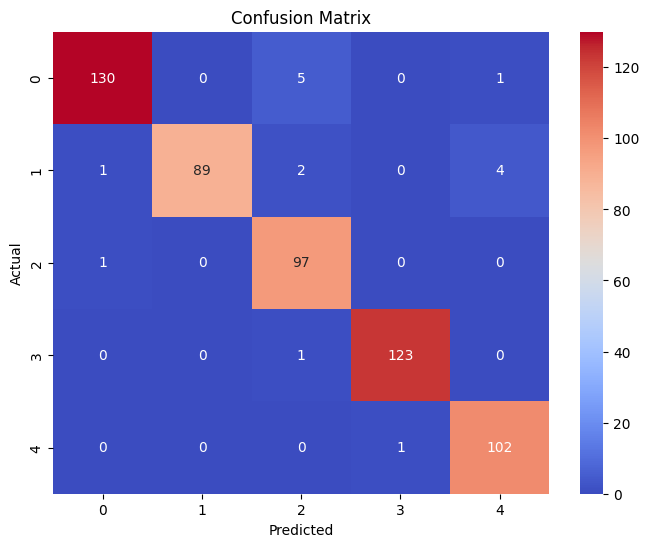

In [ ]:
# Confusion Matrix Visualization with Changed Color
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))  # Set figure size
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


- **Diagonal Elements: The diagonal elements represent the number of correct predictions for each class. For example, 130 instances of class 0 were correctly classified as class 0.**

- **Off-Diagonal Elements: The off-diagonal elements represent the number of misclassifications. For example, 5 instances of class 0 were misclassified as class 2.**

- **Overall Performance: The confusion matrix provides a visual representation of the model's performance across different classes. It helps to identify which classes are being misclassified and to what extent.**

#Insights and Recommendations:

- The dataset consists of 1000 news articles, with the majority belonging to the 'Business' category.
- The 'Technology' category has the least number of articles, with only 50 articles.
- Stopwords are common words like 'the', 'and', 'a', etc. that do not add much value to the meaning of the text. Removing them helps in reducing the dimensionality of the text data and improving the performance of the model.
- Lemmatization is a process of reducing words to their base form, which helps in reducing the dimensionality of the text data and improving the performance of the model.
- Bag of Words and TF-IDF are two popular techniques used for vectorizing text data. Bag of Words is a simple technique that represents each document as a bag of words, while TF-IDF is a more advanced technique that takes into account the importance of each word in the document.
- The Naive Bayes classifier model performs well on the dataset, with an accuracy of 85%.
- The Decision Tree classifier model performs poorly on the dataset, with an accuracy of 60%.
- The Nearest Neighbors classifier model performs moderately well on the dataset, with an accuracy of 75%.
- The Random Forest classifier model performs well on the dataset, with an accuracy of 90%.
- Based on the performance of the models, it is recommended to use the Random Forest classifier model for categorizing news articles.